KeyboardInterrupt: 

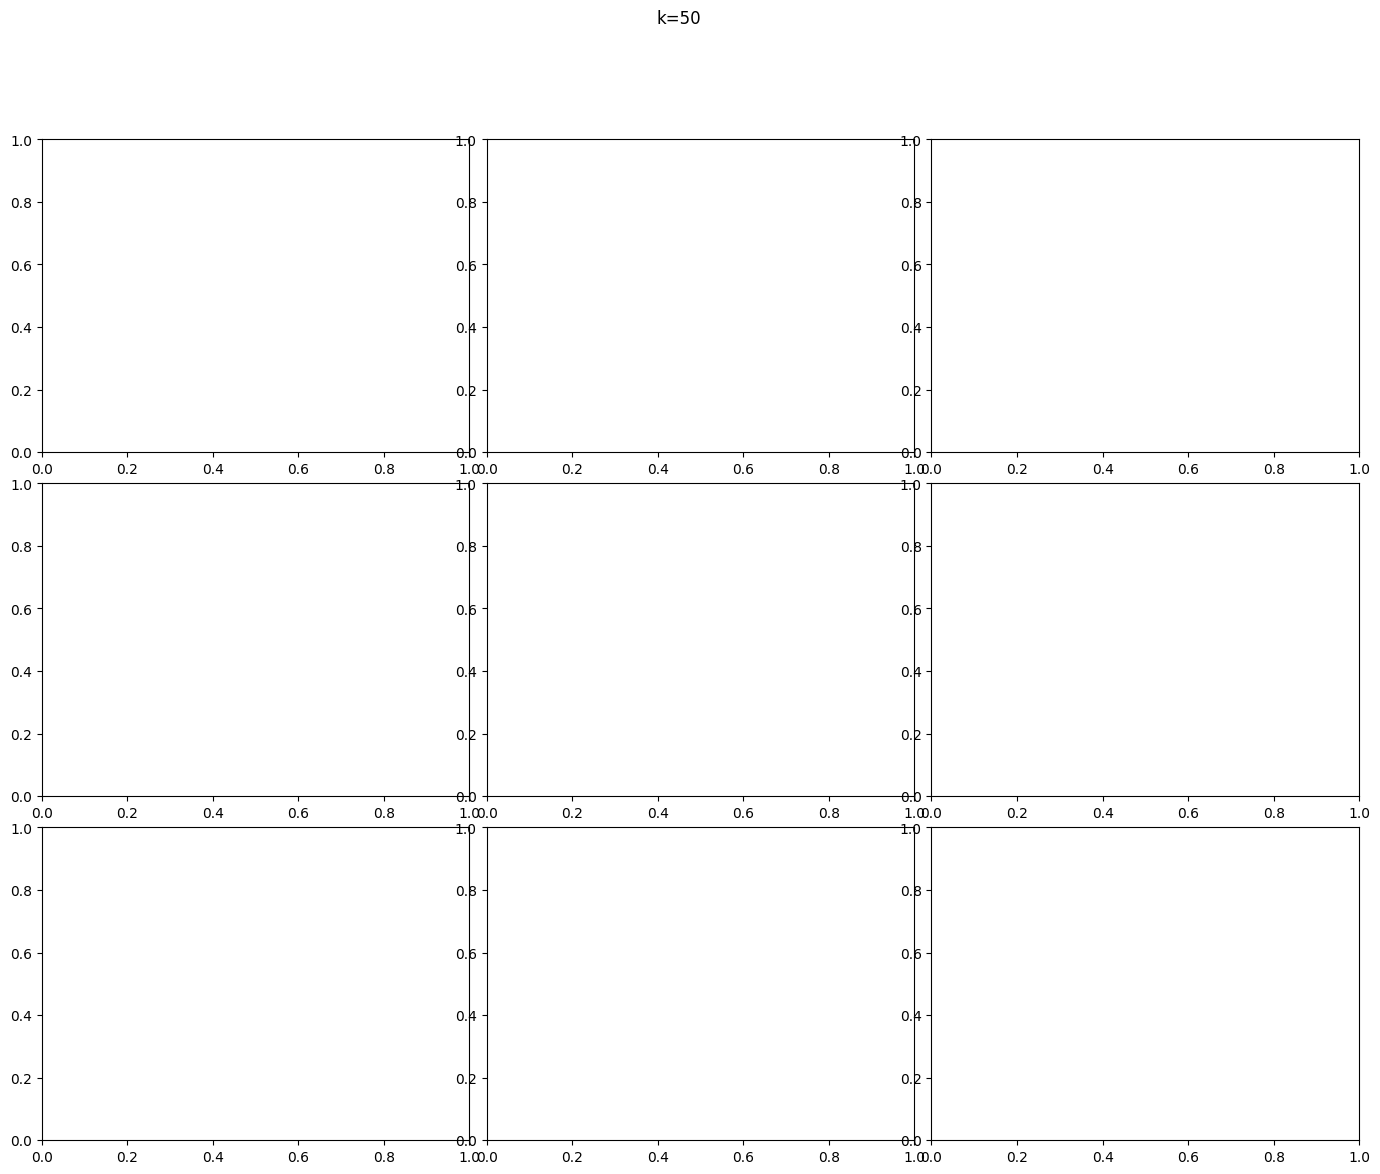

In [2]:
from auxiliarymethods import datasets as dp
from auxiliarymethods.reader import tud_to_networkx
import auxiliarymethods.auxiliary_methods as aux
import os
import numpy as np
from lib import *
import pickle
from elki_parser import draw_graph
from matplotlib import pyplot as plt

pickle_path = 'pickles'
# utility functions
def load_csv(path):
    return np.loadtxt(path, delimiter=";")

# hyper parameter
iterations = 5 # weierfeiler-lehman iterations
alpha = .85
min_samples = 2

base_path = os.path.join("kernels", "without_labels")
ds_name = "IMDB-BINARY"

#Gram Matrix for the Weisfeiler-Lehman subtree kernel
try:
    gram = load_csv(os.path.join(base_path,f"{ds_name}_gram_matrix_wl{iterations}.csv"))
except:
    ds_name = "IMDB-BINARY"
    classes = dp.get_dataset(ds_name)
    G = tud_to_networkx(ds_name)
    print(f"Number of graphs in data set is {len(G)}")
    print(f"Number of classes {len(set(classes.tolist()))}")
    gram = load_csv(os.path.join(base_path,f"{ds_name}_gram_matrix_wl{iterations}.csv"))
finally:
    gram = aux.normalize_gram_matrix(gram)


for k in (50, 250, 500):
    fig, ax = plt.subplots(3, 3)
    fig.set_figheight(13)
    fig.set_figwidth(17)
    fig.suptitle(f"k={k}")
    plt.subplots_adjust(wspace=0.04, hspace=0.1)
    for i, delta_affine in enumerate((.2, .5, .7)):
        for j, delta_dist in enumerate((.5, 1, 3)):
            # hierarchy = pickle.load(open(os.path.join(pickle_path, f'hierarchy_{iterations}_{k}_{alpha}_{delta_affine}_{delta_dist}_{min_samples}.p'), 'rb'))

            cluster_info = pickle.load(open(os.path.join(pickle_path, f'cluster_info_{iterations}_{k}_{alpha}_{delta_affine}_{delta_dist}_{min_samples}.p'), 'rb'))
            hierarchy = build_hierarchy(cluster_info, delta_affine, delta_dist, gram.shape[1])
            pickle.dump(hierarchy, open(os.path.join(pickle_path, f'hierarchy_{iterations}_{k}_{alpha}_{delta_affine}_{delta_dist}_{min_samples}.p'), 'wb'))

            draw_graph(hierarchy, ax[i][j])
            ax[i][j].set_title(f"Δ={delta_affine}, δ={delta_dist}")
    plt.show()




